In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from kjm2601 import obsidian_media_path as path


In [2]:
def spring(x0, y0, x1, y1, n, rx = 0.1, ry = 0.05):
    t = np.linspace(0, 1, 1000)
    x = x0 + (x1 - x0) * t
    y = y0 + (y1 - y0) * t
    
    r_t = np.ones_like(t)
    r_t[t<0.1] = 0
    r_t[t>0.9] = 0 
    dx = np.cos(2 * np.pi * n * t) * r_t * rx
    dy = np.sin(2 * np.pi * n * t) * r_t * ry
    return x + dx, y + dy

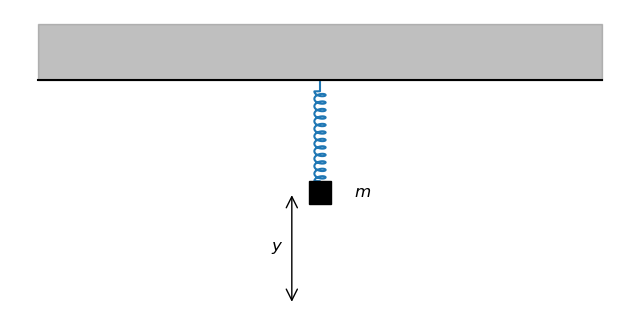

In [3]:
plt.figure(figsize=(8, 4))

# draw ceiling
plt.plot([0, 10], [10, 10], 'k-')
plt.fill_between([0, 10], 10, 11, color='gray', alpha=0.5)

#draw spring attached to ceiling
x0, y0 = 5, 10
x1, y1 = 5, 8
x,y = spring(x0, y0, x1, y1, 15)
plt.plot(x,y, zorder=-10)
p = patches.Rectangle((x1-0.2, y1-0.2), 0.4, 0.4, color='black')
plt.gca().add_patch(p)

# add arrow
arrow = patches.FancyArrowPatch((x1-0.5, y1), (x1-0.5, y1-2), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow)
plt.text(x1-0.75, y1-1, '$y$', fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.text(x1+0.75, y1, '$m$', fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.axis('equal')
plt.axis('off')
plt.savefig(path + 'spring.svg', bbox_inches='tight')
plt.show()